Team members: Huanzhe Wang, Fangrui Zhang, Yachen Wei

In [35]:
!pip install scikit-learn==1.3.0 xgboost --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


In [8]:
import numpy as np
import seaborn as sns
import matplotlib as pt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

In [1]:
# Read in training data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/122kxiprQhzR123mGnyGxSERg854FmbBF/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


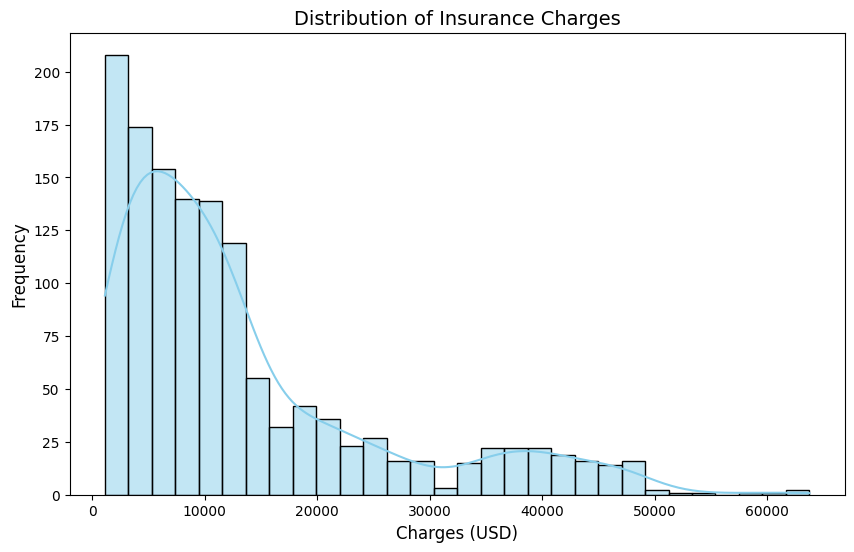

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制分布直方图+密度曲线
sns.histplot(data=df, x='charges', kde=True, bins=30, color='skyblue')

# 添加标题和标签
plt.title('Distribution of Insurance Charges', fontsize=14)
plt.xlabel('Charges (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 显示图形
plt.show()

In [5]:
print(df['charges'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [2]:
# Read in test data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1qZIgsTvpF4acFXosreetuGZyYaOjhSgM/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.head())

   age  sex        bmi  children  smoker  region
0   58    0  30.338722         0       0       1
1   60    0  24.324606         0       0       0
2   27    0  18.228846         3       0       1
3   24    0  40.426077         0       1       2
4   19    0  35.872515         0       0       0


In [3]:
# Insert code blocks for engineering below
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [4]:
sex_map = {'female': 1, 'male': 0}
smoker_map = {'yes': 1, 'no': 0}
region_map = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

df['sex'] = df['sex'].map(sex_map)
df['smoker'] = df['smoker'].map(smoker_map)
df['region'] = df['region'].map(region_map)

# Define features and target
X = df.drop(columns='charges')
y = df['charges']

In [5]:
def plot_learning_curve(estimator, X, y, title='Learning Curve', cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Mean and standard deviation of training and validation scores
    train_scores_mean = -np.mean(train_scores, axis=1)  # MSE is negative by default
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training error", marker='o')
    plt.plot(train_sizes, val_scores_mean, label="Validation error", marker='x')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

Validation MSE: 26537344.0832


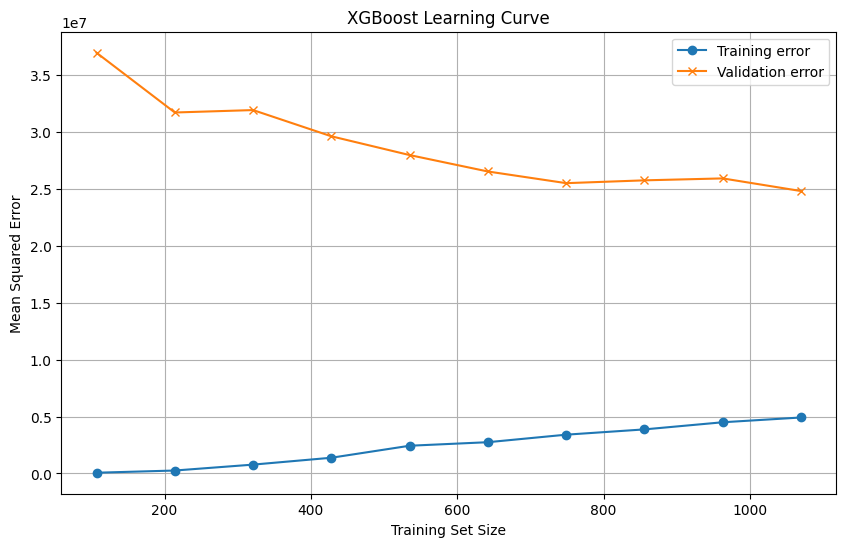

In [21]:
#1st version
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=222)

# 定义 XGBoost 模型
xgb_model0 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42
)

xgb_model0.fit(X_train, y_train)
y_val_pred = xgb_model0.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {mse:.4f}")

# 生成学习曲线
plot_learning_curve(xgb_model0, X, y, title="XGBoost Learning Curve")

In [22]:
#Feature engineering
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#use random forest regressor to get the best feature set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

# 4️⃣ 选择重要特征
selector = SelectFromModel(rf, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# 输出选择的特征数量
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features ({len(selected_features)}): {list(selected_features)}")

# 5️⃣ 训练 XGBoost 模型（仅使用选中的特征）
xgb_model1 = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=6,
                         subsample=0.8, colsample_bytree=0.8, n_estimators=100, random_state=42)

xgb_model1.fit(X_train_selected, y_train)

# 6️⃣ 进行预测
y_val_pred = xgb_model1.predict(X_val_selected)

# 7️⃣ 计算模型性能
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")

Selected Features (3): ['age', 'bmi', 'smoker']
Validation MSE: 26968759.5405
Validation R² Score: 0.8436


In [41]:
#Feature engineering
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#use random forest regressor to get the best feature set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

# 4️⃣ 选择重要特征
#selector = SelectFromModel(rf, threshold="median", prefit=True)
selector = SelectFromModel(rf, threshold=0.01, prefit=True)  # 保留重要性 > 0.01 的特征
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_selected = selector.transform(X)

# 输出选择的特征数量
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features ({len(selected_features)}): {list(selected_features)}")

# 5️⃣ 训练 XGBoost 模型（仅使用选中的特征）
xgb_model1_1 = XGBRegressor(objective='reg:squarederror',
                            learning_rate=0.1,
                            max_depth=6,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            n_estimators=100,
                            random_state=42)

xgb_model1_1.fit(X_train_selected, y_train)

# 6️⃣ 进行预测
y_val_pred = xgb_model1_1.predict(X_val_selected)

# 7️⃣ 计算模型性能
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")

Selected Features (5): ['age', 'bmi', 'children', 'smoker', 'region']
Validation MSE: 19940855.1428
Validation R² Score: 0.8716


In [15]:
print(feature_importances)

[0.13542075 0.00668482 0.20950414 0.02246327 0.61021547 0.01571155]


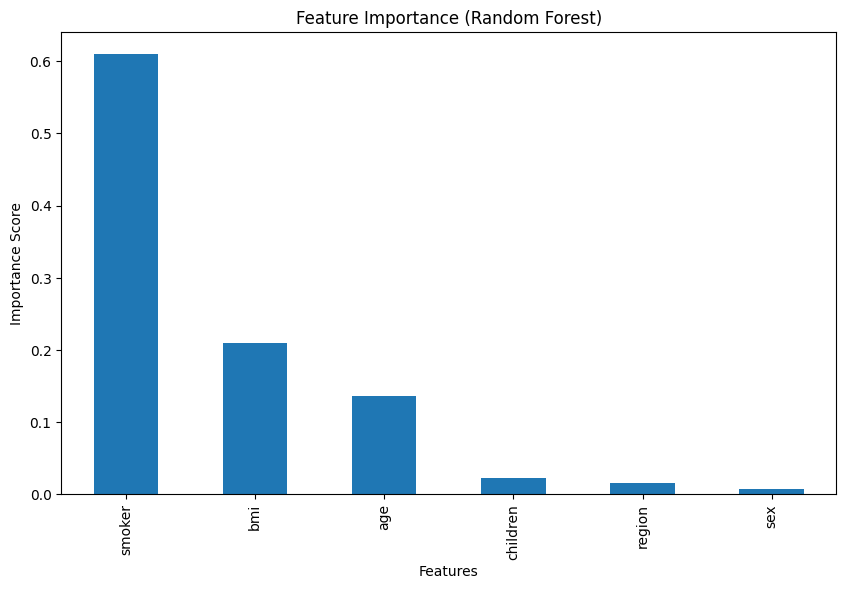

In [15]:
import matplotlib.pyplot as plt

# 获取特征重要性并排序
importances = pd.Series(feature_importances, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# 绘制特征重要性
plt.figure(figsize=(10, 6))
importances.plot(kind="bar")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

Validation MSE: 22287977.8299
Validation R² Score: 0.8564


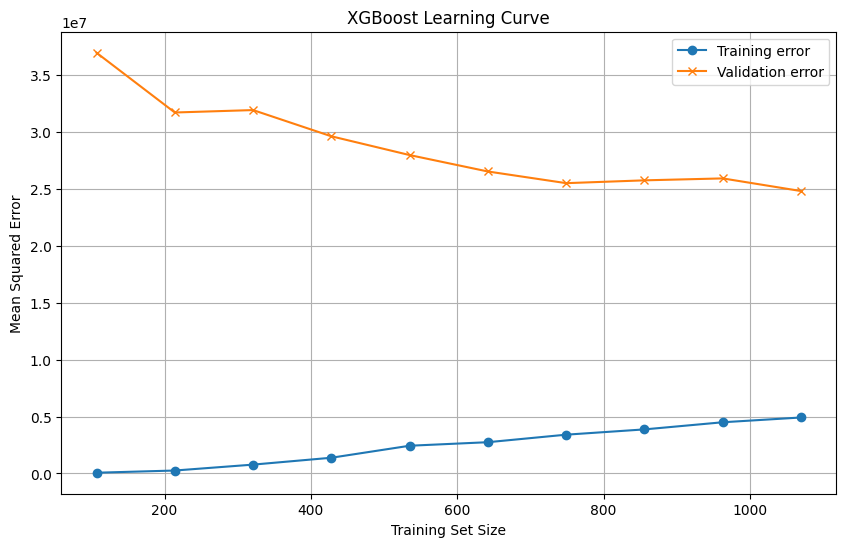

In [23]:
#Logarithmic transformation and normalization of labels
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 数据拆分
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 对数变换标签数据
y_train_log = np.log1p(y_train)  # log1p 处理 y = 0 的情况
y_val_log = np.log1p(y_val)

# 标准化标签数据
scaler = StandardScaler()
y_train_log_std = scaler.fit_transform(y_train_log.values.reshape(-1, 1)).ravel()  # 标准化并展平
y_val_log_std = scaler.transform(y_val_log.values.reshape(-1, 1)).ravel()

# 使用 XGBRegressor 模型
xgb_model2 = XGBRegressor(
    objective='reg:squarederror',  # 回归任务
    learning_rate=0.1,  # 学习率
    max_depth=6,  # 树的最大深度
    subsample=0.8,  # 训练集采样比例
    colsample_bytree=0.8,  # 特征采样比例
    n_estimators=100,  # 弱学习器数量
    random_state=42
)

# 训练模型
xgb_model2.fit(X_train, y_train_log_std)

# 在验证集上进行预测
y_val_pred_log_std = xgb_model2.predict(X_val)

# 将预测值逆标准化
y_val_pred_log = scaler.inverse_transform(y_val_pred_log_std.reshape(-1, 1)).ravel()

# 将预测值逆对数变换
y_val_pred = np.expm1(y_val_pred_log)

# 评估模型
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")

# 生成学习曲线
plot_learning_curve(xgb_model2, X, y, title="XGBoost Learning Curve")

Validation MSE: 19908555.8291
Validation R² Score: 0.8718


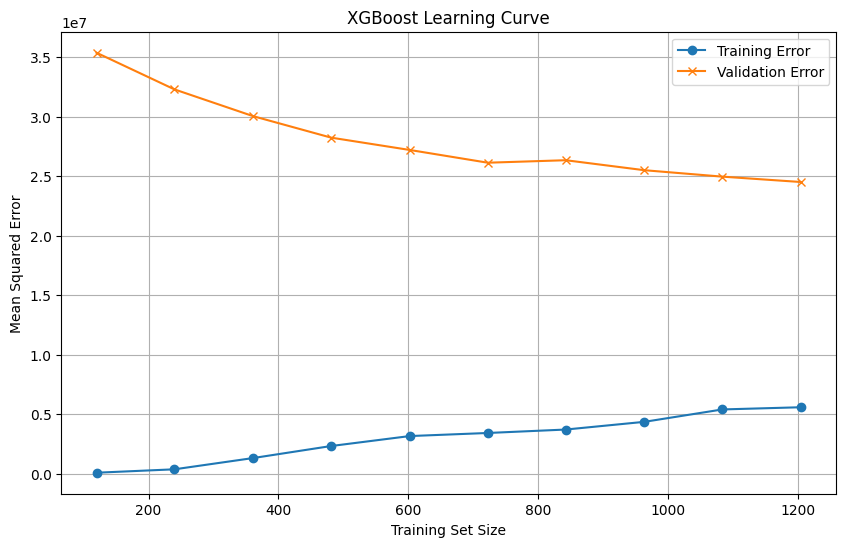

In [56]:
#Feature engineering with select feature and Logarithmic transformation and normalization of labels
xgb_model3 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42
)

xgb_model3.fit(X_train_selected, y_train_log_std)
y_val_pred_log_std = xgb_model3.predict(X_val_selected)
y_val_pred_log = scaler.inverse_transform(y_val_pred_log_std.reshape(-1, 1)).ravel()
y_val_pred = np.expm1(y_val_pred_log)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")

plot_learning_curve(xgb_model3, X, y, title="XGBoost Learning Curve")

In [39]:
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# 对标签进行对数变换
y_log = np.log1p(y)

# 定义 XGBRegressor 模型
xgb_model4 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42
)

# 创建一个包含标准化标签的 Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # 标准化
    ("xgb", xgb_model4)             # XGBoost 模型
])

# 定义交叉验证策略
kf = KFold(n_splits=10, shuffle=True, random_state=222)

# 使用交叉验证预测
y_log_pred_cv = cross_val_predict(pipeline, X_selected, y_log, cv=kf, n_jobs=-1)

# 对预测结果进行逆变换
y_pred_cv = np.expm1(y_log_pred_cv)  # 逆对数变换

# 在原始标签上评估交叉验证结果
mse_cv = mean_squared_error(y, y_pred_cv)
r2_cv = r2_score(y, y_pred_cv)

print(f"Cross-validated MSE: {mse_cv:.4f}")
print(f"Cross-validated R²: {r2_cv:.4f}")

Cross-validated MSE: 22788025.6888
Cross-validated R²: 0.8445


In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# 创建 XGBRegressor 模型
xgb_model5 = XGBRegressor(
    objective='reg:squarederror',
    max_depth=4,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)

# 创建 Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # 对数变换后的标签标准化
    ("xgb", xgb_model5)             # XGBoost 模型
])

# 定义超参数搜索范围
param_grid = {
    "xgb__learning_rate": [0.004, 0.006, 0.005],
    #"xgb__max_depth": [4, 6, 5],
    "xgb__n_estimators": [900, 800, 700],
    #"xgb__subsample": [0.8, 1.0, 0.9],
    #"xgb__colsample_bytree": [0.8, 1.0, 0.9]
}

# 定义 10 折交叉验证策略
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 训练模型
grid_search.fit(X_selected, y_log)

# 输出最佳参数和最优模型
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# 对最佳模型进行交叉验证预测
y_log_pred = cross_val_predict(best_model, X_selected, y_log, cv=kf, n_jobs=-1)

# 对预测结果进行逆对数变换
y_pred = np.expm1(y_log_pred)

# 在原始标签上评估结果
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Final Cross-validated MSE: {mse:.4f}")
print(f"Final Cross-validated R²: {r2:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'xgb__learning_rate': 0.004, 'xgb__n_estimators': 900}
Final Cross-validated MSE: 20787285.3224
Final Cross-validated R²: 0.8581


Selected Features (5): ['age', 'bmi', 'children', 'smoker', 'region']


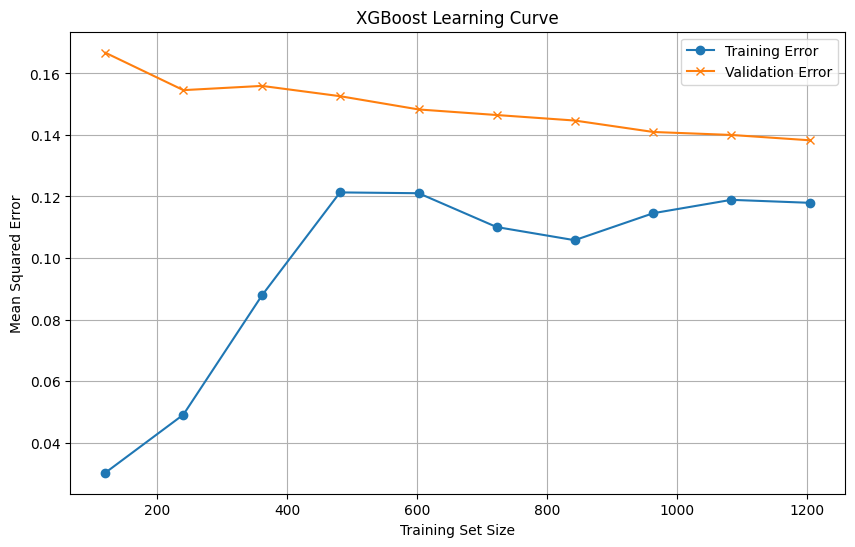

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, learning_curve
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# 特征选择：使用随机森林选择重要特征
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 获取重要特征（阈值 > 0.01）
selector = SelectFromModel(rf, threshold=0.01, prefit=True)
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features ({len(selected_features)}): {list(selected_features)}")

# 对目标变量进行对数变换
y_log = np.log1p(y)

# 创建 XGBRegressor 模型
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.004,
    max_depth=4,
    subsample=1.0,
    colsample_bytree=1.0,
    n_estimators=900,
    random_state=42
)

# 创建 Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # 标准化
    ("xgb", xgb_model)             # XGBoost 模型
])

# 定义 K 折交叉验证策略
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 绘制学习曲线
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=10, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # 计算训练和验证集的平均分数
    train_scores_mean = -np.mean(train_scores, axis=1)  # 转为正 MSE
    val_scores_mean = -np.mean(val_scores, axis=1)

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, val_scores_mean, label="Validation Error", marker='x')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# 调用学习曲线函数
plot_learning_curve(pipeline, X_selected, y_log, title="XGBoost Learning Curve", cv=kf)

In [55]:
#mse_val = mean_squared_error(y_val, y_val_pred)
#print(f"Validation MSE: {mse_val:.4f}")

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Final Cross-validated MSE: {mse:.4f}")
print(f"Final Cross-validated R²: {r2:.4f}")

Final Cross-validated MSE: 19940855.1428
Final Cross-validated R²: 0.8716


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features (5): ['age', 'bmi', 'children', 'smoker', 'region']
Validation MSE: 18771831.9034
Validation R²: 0.8791


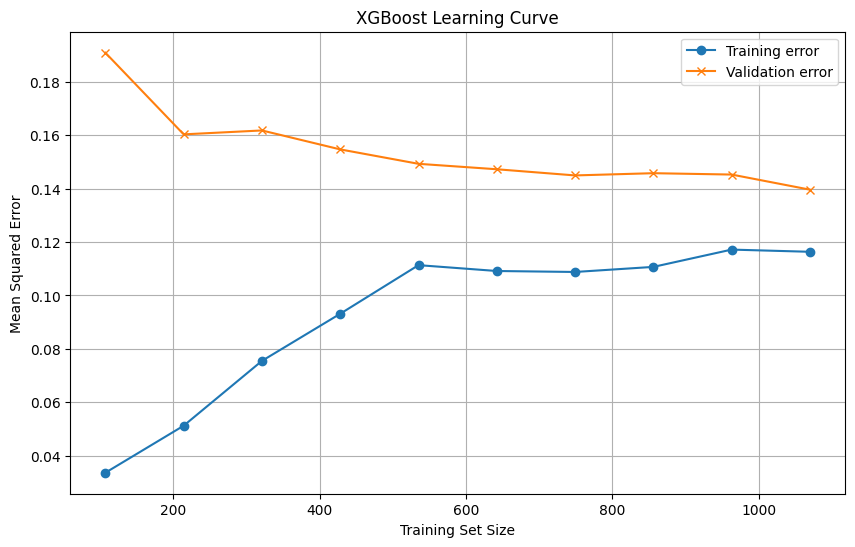

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# 数据拆分
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征选择：使用随机森林筛选重要特征
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 仅保留重要性大于 0.01 的特征
selector = SelectFromModel(rf, threshold=0.01, prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_selected_all = selector.transform(X)  # 训练全部数据用于学习曲线

# 输出选定的特征
selected_features = X.columns[selector.get_support()]
print(f"Selected Features ({len(selected_features)}): {list(selected_features)}")

# 对目标变量进行对数变换
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_log_all = np.log1p(y)  # 全部数据用于学习曲线

# 标签标准化
scaler = StandardScaler()
y_train_log_std = scaler.fit_transform(y_train_log.values.reshape(-1, 1)).ravel()
y_val_log_std = scaler.transform(y_val_log.values.reshape(-1, 1)).ravel()

# 定义 XGBRegressor 模型
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.004,
    max_depth=4,
    subsample=1.0,
    colsample_bytree=1.0,
    n_estimators=900,
    random_state=42
)

# 训练模型
xgb_model.fit(X_train_selected, y_train_log_std)

# 在验证集上预测
y_val_pred_log_std = xgb_model.predict(X_val_selected)

# 逆标准化
y_val_pred_log = scaler.inverse_transform(y_val_pred_log_std.reshape(-1, 1)).ravel()

# 逆对数变换
y_val_pred = np.expm1(y_val_pred_log)

# 计算 MSE
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {mse_val:.4f}")

r2 = r2_score(y_val, y_val_pred)
print(f"Validation R²: {r2:.4f}")

# 生成学习曲线
plot_learning_curve(xgb_model, X_selected_all, y_log_all, title="XGBoost Learning Curve")

In [9]:
xgb_model.fit(X, y)

# Predict on test data
predictions = xgb_model.predict(df_test)
print("Predictions on test data:", predictions)

Predictions on test data: [12291.843  14415.827   4815.357  38957.95    3243.0798  8139.138
  6962.75    3551.9556  3002.326   3456.2551  5713.0845  4538.2
  8542.213  10433.269  14100.963   7361.182  13238.455   7284.8306
  7226.1924 10266.705  24071.928  44536.953   3304.8496 13097.958
  6545.9976  4184.987  12254.197   6162.5205 12249.703   5735.7544
 24071.928   6554.769   9329.789   5358.4927  6358.284  12178.767
  4168.6714 12424.405   3149.3184  6756.042   5713.0845 38957.95
  9950.807   8919.153   7226.1924 16206.683  17565.057  15756.657
  4538.2    41296.55    8044.893   6597.6113  7440.623   5889.4443
  4625.2065  3023.7166  7575.0957  6335.094   5781.8     9817.918
 14009.928   5465.3174 14198.924   9471.331  13044.953  13280.595
  3173.9421  6795.0254 14560.833   3530.5654 21409.873  11127.603
 16075.617  11162.679   8946.594   8143.152  11375.719   4604.4233
 12980.082   4824.739  10097.073   5822.6357 14087.726  14542.315
  4735.4653 42723.938   4783.138  14094.677   960

In [10]:
# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)

print("submit.csv file created successfully!")

submit.csv file created successfully!
